### Text Sentiment Analysis

##### This is version one of the sentiment analysis done on the American Airlines Twitter dataset, utilizing logistic regression and basic preprocessing.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Copy the data to your local drive
!cp /content/drive/MyDrive/archive/archive-3/Tweets.csv /content/

In [5]:
import pandas as pd
import re

# Load the dataset
file_path = '/content/Tweets.csv'
data = pd.read_csv(file_path)

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Preprocess the text data
data['text'] = data['text'].apply(preprocess_text)

# Save preprocessed data to a new file
data.to_csv('preprocessed_airline_tweets.csv', index=False)


In [6]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Load preprocessed data
data = pd.read_csv('preprocessed_airline_tweets.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['airline_sentiment'], test_size=0.2, random_state=42)

# Create a Bag of Words representation
vectorizer = CountVectorizer(max_features=2000)
X_train_bow = vectorizer.fit_transform(X_train).toarray()
X_test_bow = vectorizer.transform(X_test).toarray()

# Scale the data
scaler = StandardScaler()
X_train_bow_scaled = scaler.fit_transform(X_train_bow)
X_test_bow_scaled = scaler.transform(X_test_bow)

# Train a Logistic Regression model with increased max_iter
model = LogisticRegression(max_iter=1000)
model.fit(X_train_bow_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_bow_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.86      0.82      0.84      1889
     neutral       0.53      0.56      0.55       580
    positive       0.60      0.65      0.62       459

    accuracy                           0.75      2928
   macro avg       0.66      0.68      0.67      2928
weighted avg       0.75      0.75      0.75      2928



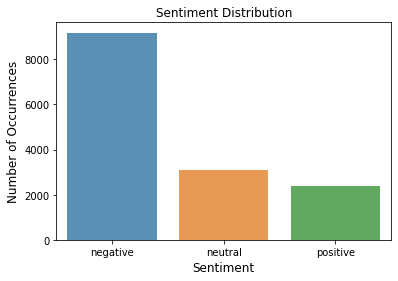

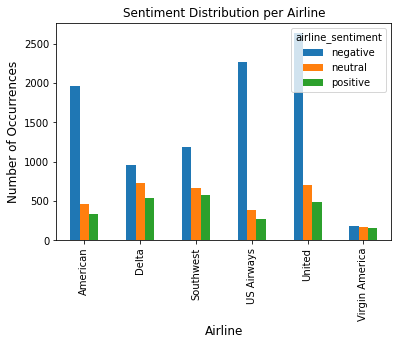

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the sentiment distribution
sentiment_count = data['airline_sentiment'].value_counts()
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, alpha=0.8)
plt.title('Sentiment Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.show()


# Plot the sentiment distribution per airline
airline_sentiment = data.groupby(['airline', 'airline_sentiment']).size().unstack()
airline_sentiment.plot(kind='bar', title='Sentiment Distribution per Airline')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.show()


